 # This is a demo/documentation of the module.

 For the sake of performance,
 the module is set to not do all calculations dynamically,
 thus it is necessary to **set global parameters at the beginning**.

In [1]:
# -*- coding: utf-8 -*-
from growth2fig import Experiment, Plate, Plot

 ### Conversion factor for OD plate to OD cuvette
 The conversion factor *cvf* has to be determined experimentally.
 According to the *Lambert-Beer law*, $A = \varepsilon * l * c$,
 factors that change $\varepsilon$, such as wavelength & species,
 path length $l$, such as well size & culture volume, will change the *cvf* value.

 When `cvf = 1`, the calculation takes the raw data,
 does not calibrate to cuvette OD.

In [2]:
Experiment.cvf = 0.23 

 ### initial OD (cuvette OD)

In [3]:
Experiment.ini_OD = 0.02

 ### Model for calculations.
 The module fits Time-log(OD) to linear regression for growth parameters calculation,
 as described in [He *et al*., 2018](https://doi.org/10.1021/acssynbio.8b00093).

The window size has a unit of hours.

In [5]:
Experiment.WIN = 5
Experiment.TH = 0.05

 `Plate` holds data/calculations for the whole plate.

 Give data file name (and Sheet_name, default `Sheet_name = 'Sheet1'`) to it.
 **The data file should follow the format as the testing data.**

 Set a upper time limit for calculation and plotting if necessary.

In [6]:
Experiment.plate = Plate('testingData.xlsx')
# Experiment.plate.time_upper = 100 

 The module has three line plotting options:
 'all' (default), 'mean', and 'patch'.

 See below their demos.

In [7]:
Plot.figure_type='all'
# Plot.figure_type='mean'
# Plot.figure_type='patch'

 The Y-scale can be set to log (default) or linear scale.

In [8]:
Plot.yscale='log'
# Plot.yscale='linear'

 The Y-axis upper limit can be set here.

In [9]:
Plot.ymax=None  # None or a OD value

 If the figures need to be saved, all formats that matplotlib accept are options.
 The file names will be the title of the experiment.

In [10]:
Plot.format=None  # 'eps','png', or None

 ### Ways to plot
 initialize a experiment with a title,
 it will appear in the same plot.

 In legend:
 * doubling time, time point, maximum OD
 * SD in parentheses
 * 'NG' stands for No growth,
 which means maximum OD does not pass the threshold (TH) set above,
 or doubling time above 200 hours.

 Note that *time point* is the start time point of the window for the calculations.

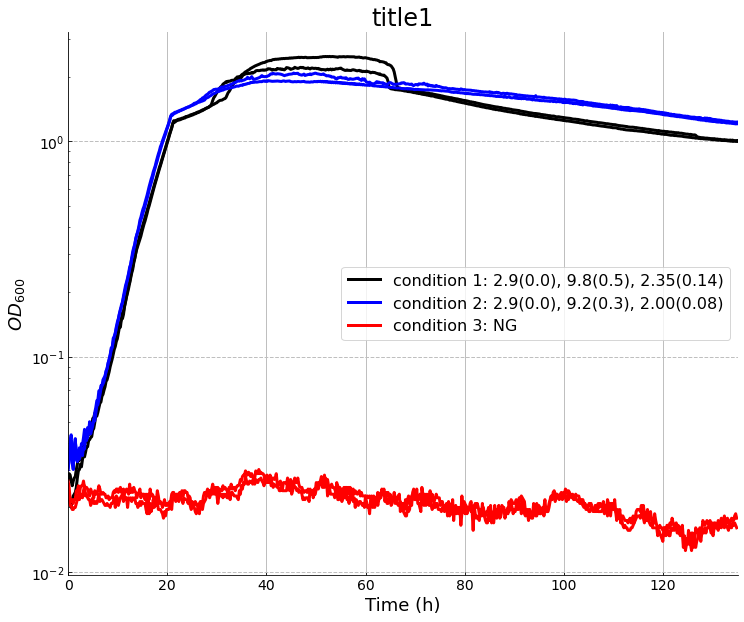

In [11]:
exp1 = Experiment('title1')
# conditions in a list 
exp1.conditions=['condition 1', 'condition 2', 'condition 3']
# replicates (in tuples) set-ups of the experiment in a list 
# in the same of as conditions above 
exp1.repl_well_ids=[('A1','A2'), ('A3','A4'),('A5','A6')]

p1=Plot(exp1)
p1.plot()

 ### Alternatively

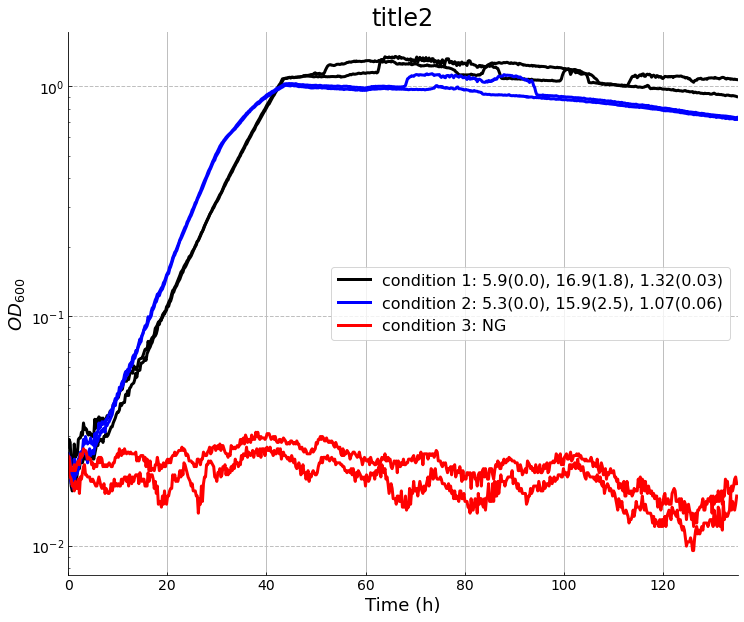

In [12]:
exp2=Experiment('title2')
exp2.set_ups={
    'Title':'title2',
    'condition 1':('B1','B2'),
    'condition 2':('B3','B4'),
    'condition 3':('B5','B6')
}
exp2.plot()

 ### Report growth parameters

In [13]:
plate1=Plate('testingData.xlsx')
exp3 = Experiment('title 3')
exp3.plate = plate1
exp3.conditions = ['condition 1', 'condition 2', 'condition 3']
exp3.repl_well_ids = [('C1','C2'), ('C3','C4'),('C5','C6')]
exp3.result_rep

,Experiment,Condition,Wells,Growth rate,Doubling time,Max OD,Start time
0,title 3,condition 1,"(C1, C2)","(0.19283546483960362, 0.03369467124646634)","(3.707702371889199, 0.6478570350348365)","(1.612826098203659, 0.42195650546447094)","(14.785777777777778, 7.341333333333334)"
0,title 3,condition 2,"(C3, C4)","(0.25814403374589734, 0.014310821431590903)","(2.6933955695431915, 0.14931471582377132)","(2.1621739264674806, 0.0030435945676721143)","(20.57604166666667, 0.5170972222222243)"
0,title 3,condition 3,"(C5, C6)","(0.6215834999434032, 0.0)","(1.1151312424204602, 0.0)","(1.1047826123885485, 1.0721739138598028)","(21.920305555555558, 0.0)"


 ### Plot in 'mean' mode

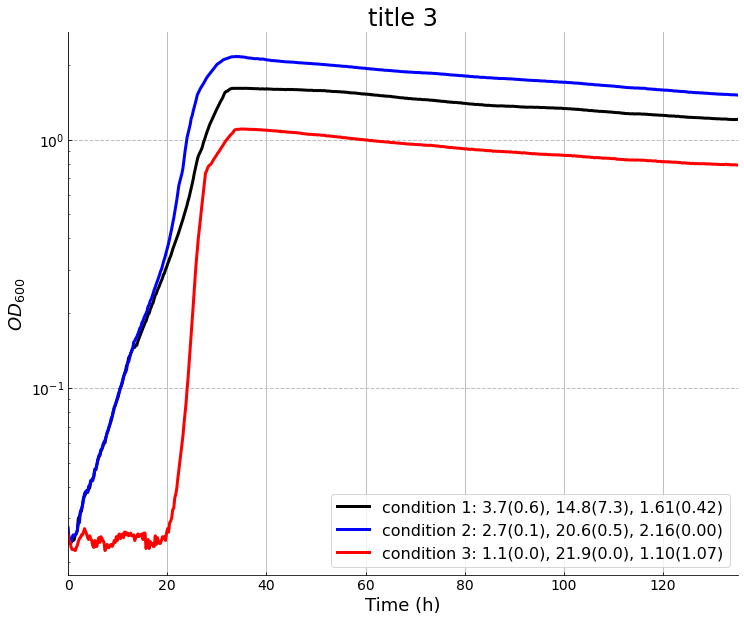

In [14]:
p3=Plot(exp3)
p3.figure_type='mean'
p3.plot()

 ### Plot in 'patch' mode
 $mean \pm SD$

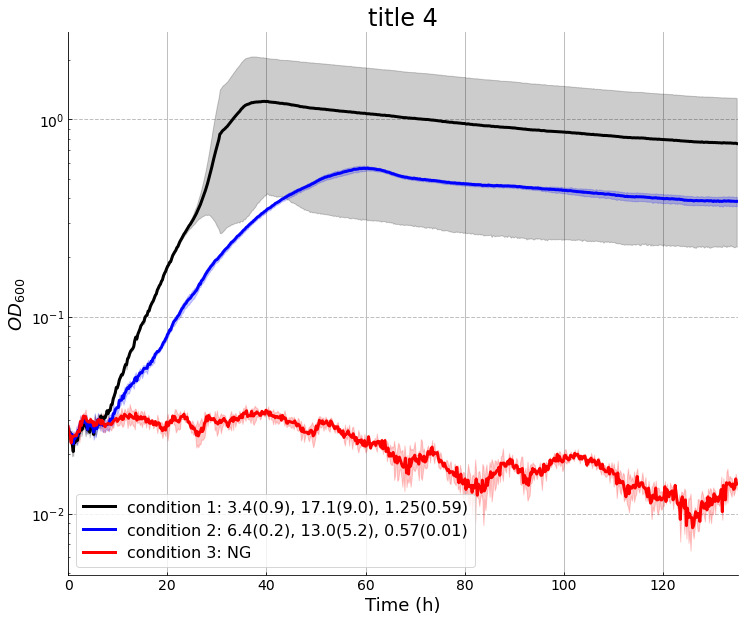

In [15]:
exp4 = Experiment('title 4')
exp4.conditions=['condition 1', 'condition 2', 'condition 3']
exp4.repl_well_ids=[('D1','D2'), ('D3','D4'),('D5','D6')]
p4 = Plot(exp4)
p4.figure_type='patch'
p4.plot()

 ### Growth parameters of the whole plate

In [16]:
plate1.plate_gps

,Growth rate,Doubling time,Start time,Max OD
A1,0.238927,2.901083,9.305556,2.482609
A2,0.235278,2.946077,10.339778,2.21
A3,0.239105,2.898927,8.892,2.078261
A4,0.241488,2.870313,9.512361,1.915652
A5,NaN,NaN,NaN,0.03
...,...,...,...,...
G2,0.120462,5.754081,34.121194,0.533913
G3,0.13854,5.003218,32.260083,0.514783
G4,0.582472,1.190009,26.056111,1.99
G5,NaN,NaN,NaN,0.025652


 ### Plot the whole plate

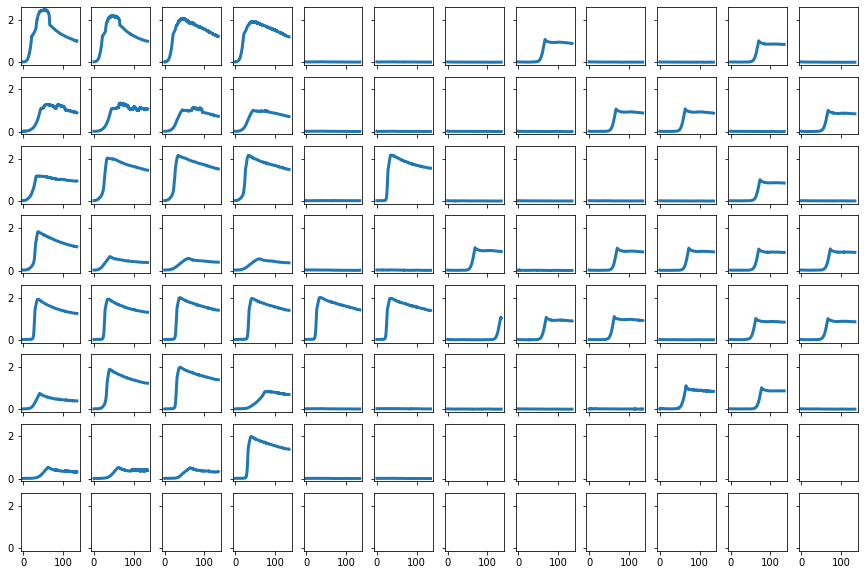

In [17]:
plate1.view_plate()

 Default `linestyles` and `colors` are as below.

In [18]:
# set linestyles, preset 10 solid lines for all
Plot.linestyles = ['-','-','-','-','-','-','-','-','-','-']
# set colors, preset 10 colors
Plot.cmap = ['k', 'b', 'r','g','c','m','y','saddlebrown','orange','olive']